In [2]:
import os

# Retrieve current working directory (`cwd`)
cwd = os.getcwd()
print(cwd)

# Change directory
os.chdir(r"C:\Users\meira\OneDrive - University of Florida\Fall_2020\Water_Risk_Extreme_Events_Serafin\final_project")

# List all files and directories in current directory
os.listdir('.')

C:\Users\meira\OneDrive - University of Florida\Fall_2020\Water_Risk_Extreme_Events_Serafin\final_project


['.ipynb_checkpoints',
 'daily_precip.png',
 'daily_precip_frequency.png',
 'data_download_williamson.docx',
 'final_presentation.pptx',
 'final_project.ipynb',
 'final_project_R.ipynb',
 'GEO4285_Presentation_Student_Evaluation_williamson.docx',
 'inClassExample_seasonal (1).R',
 'Inkedmadison_wi_LI.jpg',
 'intro_methods_williamson.docx',
 'kmsn.csv',
 'kmsn_1.csv',
 'kmsn_2.csv',
 'likelihoodRatioTest_Gumbel.R',
 'madison_wi.png',
 'nonstationaryEV_inClass_allsolutions.R']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st
from scipy.stats._continuous_distns import _distn_names
from scipy.optimize import curve_fit


In [4]:
# set plot parameter sizes
plt.rcParams['axes.titlesize']=24
plt.rcParams['axes.labelsize'] =20
plt.rcParams['ytick.labelsize'] =18
plt.rcParams['xtick.labelsize']=18
plt.rcParams["figure.figsize"] = [16,9]


In [5]:
# read in data
kmsn=pd.read_csv('kmsn.csv')
kmsn.keys()

Index(['STATION', 'NAME', 'DATE', 'PRCP'], dtype='object')

In [6]:
# set local prcp value; drop all zeros
prcp=kmsn['PRCP']
kmsn_0=kmsn[kmsn['PRCP']!=0]
prcp_0=kmsn_0['PRCP']
date=kmsn['DATE']
prcp_0

kmsn['year']=kmsn['DATE'].str.strip().str[:4]
kmsn['month']=kmsn['DATE'].str.strip().str[5:7]

In [7]:
# sort prcp descending
kmsn.sort_values(by=['PRCP'],ascending=False,inplace=False).head(10)

,STATION,NAME,DATE,PRCP,year,month
20622,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1996-06-17,4.51,1996,06
616,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1941-09-08,4.32,1941,09
24996,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2008-06-08,4.11,2008,06
12967,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1975-07-03,3.89,1975,07
28721,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2018-08-20,3.78,2018,08
19544,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1993-07-05,3.75,1993,07
25467,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2009-09-22,3.67,2009,09
8556,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1963-06-05,3.67,1963,06
23517,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2004-05-21,3.66,2004,05
3852,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1950-07-19,3.65,1950,07


In [8]:
# group values by year, month
df_year_group=kmsn.loc[kmsn.groupby("year")["PRCP"].idxmax()]
df_year_group_prcp=df_year_group["PRCP"]

df_month_group=kmsn.loc[kmsn.groupby("month")["PRCP"].idxmax()]
df_month_group_prcp=df_month_group["PRCP"]

df_year_group

,STATION,NAME,DATE,PRCP,year,month
173,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1940-06-22,3.05,1940,06
616,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1941-09-08,4.32,1941,09
939,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1942-07-28,2.14,1942,07
1405,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1943-11-06,1.68,1943,11
1574,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1944-04-23,1.14,1944,04
...,...,...,...,...,...,...
27653,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2015-09-17,2.15,2015,09
27961,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2016-07-21,2.79,2016,07
28352,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2017-08-16,1.68,2017,08
28721,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2018-08-20,3.78,2018,08


In [9]:
#create new df of monthly and yearly grouped prcp data
month_year=kmsn.loc[kmsn.groupby(["year", "month"])["PRCP"].idxmax()]
month_year

,STATION,NAME,DATE,PRCP,year,month
13,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1940-01-14,0.50,1940,01
53,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1940-02-23,0.43,1940,02
72,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1940-03-13,0.48,1940,03
119,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1940-04-29,0.92,1940,04
138,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1940-05-18,0.70,1940,05
...,...,...,...,...,...,...
29071,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2019-08-05,1.20,2019,08
29119,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2019-09-22,1.89,2019,09
29128,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2019-10-01,2.40,2019,10
29185,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2019-11-27,0.71,2019,11


<ipython-input-15-c103ba6e8220>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1940,1950,1960,1970,1980,1990,2000,2010,2020])


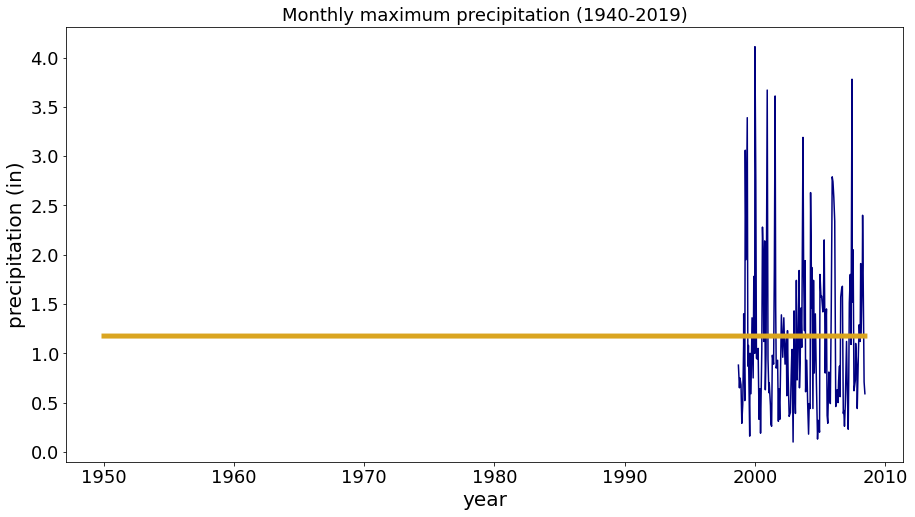

In [15]:
# graph data with best fit linear trend line
fig,ax=plt.subplots(figsize=(15,8))
ax.set_title('Monthly maximum precipitation (1940-2019)',fontsize=18)
#ax.set_xticks(xticks)
ax.set_xticklabels([1940,1950,1960,1970,1980,1990,2000,2010,2020])
ax.set_xlabel('year')
ax.set_ylabel('precipitation (in)')
ax.plot(month_year["PRCP"][800:960],color='navy')
ax.plot(m*month_year["PRCP"]+b, color='goldenrod',linewidth=5)

In [12]:
# loop for line
y=[]
i=1
while i <961:
    y.append(i)
    i+=1

In [13]:
# slope, interecept
m, b = np.polyfit(y[800:960],month_year["PRCP"][800:960], 1)


In [32]:
# find mean monthly prcp excluding zeros
prcp_0_mean=kmsn_0.groupby("month")["PRCP"].mean()
prcp_0_mean

month
01    0.126683
02    0.145159
03    0.200105
04    0.271209
05    0.288736
06    0.392186
07    0.405712
08    0.410013
09    0.353096
10    0.259441
11    0.217156
12    0.170797
Name: PRCP, dtype: float64

In [33]:
# find mean monthly prcp including zeros
prcp_mean=kmsn.groupby("month")["PRCP"].mean()
prcp_mean

month
01    0.041427
02    0.044575
03    0.069149
04    0.105658
05    0.114214
06    0.144292
07    0.126294
08    0.125815
09    0.107400
10    0.076681
11    0.070937
12    0.053581
Name: PRCP, dtype: float64

Text(0.5, 1.01, 'Average monthly precipitation')

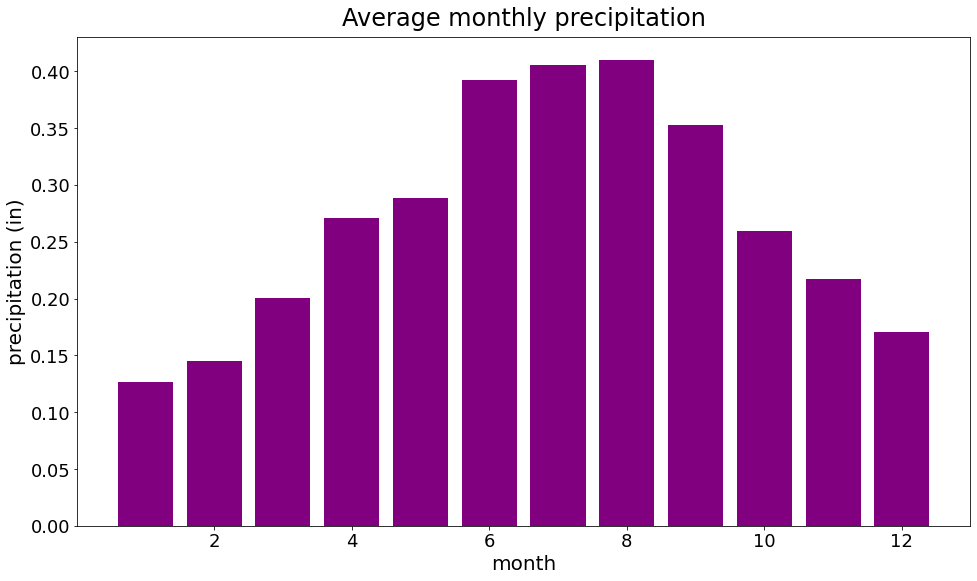

In [57]:
# graph mean monthly prcp excl zeros
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12],prcp_0_mean,color='purple')
plt.xlabel("month")
plt.ylabel("precipitation (in)")
plt.title("Average monthly precipitation, 1940-2019",y=1.01)

In [86]:
# create functions for automatically generating/fititng distributions 
def fit_to_distribution(distribution, a_list):
    distribution = getattr(st, distribution)
    params = distribution.fit(a_list)

    return params


def make_distribution_pdf(distribution, a_list):
    distribution = getattr(st, distribution)
    params = distribution.fit(a_list)

    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    x = np.linspace(min(a_list), max(a_list),100)
    y = distribution.pdf(x, loc=loc, scale=scale, *arg)
    return x, y




In [87]:
#GEV fit/distribution
*params,=fit_to_distribution('genextreme',df_year_group_prcp)
x,y=make_distribution_pdf('genextreme',df_year_group_prcp)
scipy.stats.genextreme.ppf(0.99,*params)

4.409854349199579

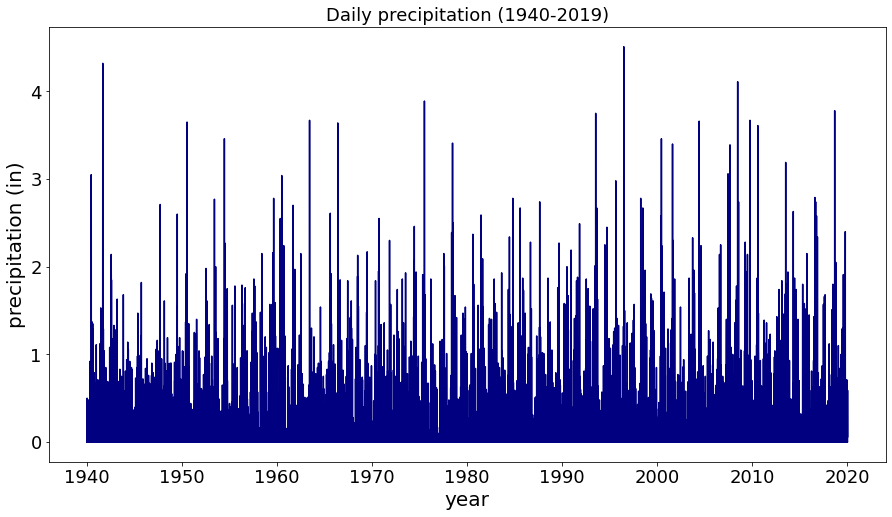

In [81]:
#graph daily precpi
fig,ax=plt.subplots(figsize=(15,8))
ax.set_title('Daily precipitation (1940-2019)',fontsize=18)
ax.set_xticks(xticks)
ax.set_xticklabels([1940,1950,1960,1970,1980,1990,2000,2010,2020])
ax.set_xlabel('year')
ax.set_ylabel('precipitation (in)')
ax.plot(prcp,color='navy')

In [76]:
kmsn.tail

<bound method NDFrame.tail of            STATION                                     NAME        DATE  PRCP  \
0      USW00014837  MADISON DANE CO REGIONAL AIRPORT, WI US  1940-01-01  0.00   
1      USW00014837  MADISON DANE CO REGIONAL AIRPORT, WI US  1940-01-02  0.00   
2      USW00014837  MADISON DANE CO REGIONAL AIRPORT, WI US  1940-01-03  0.00   
3      USW00014837  MADISON DANE CO REGIONAL AIRPORT, WI US  1940-01-04  0.00   
4      USW00014837  MADISON DANE CO REGIONAL AIRPORT, WI US  1940-01-05  0.00   
...            ...                                      ...         ...   ...   
29216  USW00014837  MADISON DANE CO REGIONAL AIRPORT, WI US  2019-12-28  0.59   
29217  USW00014837  MADISON DANE CO REGIONAL AIRPORT, WI US  2019-12-29  0.57   
29218  USW00014837  MADISON DANE CO REGIONAL AIRPORT, WI US  2019-12-30  0.21   
29219  USW00014837  MADISON DANE CO REGIONAL AIRPORT, WI US  2019-12-31  0.06   
29220  USW00014837  MADISON DANE CO REGIONAL AIRPORT, WI US  2020-01-01  0.00  

In [107]:
# EVERYTHING BELOW WAS USED TO CREATE A NEW DATASET WITH YEAR, MONTH, DAY SPLIT APART SO I COULD USE THE CODE IN R
i=1
doy=[]
doy_leap_year=[]
while i < 366:
    doy.append(i)
    i+=1
i=1
while i < 367:
    doy_leap_year.append(i)
    i+=1

In [111]:
j=0
j_array=[]
while j < (2020-1940):
    j_array.append(j)
    j+=4


In [112]:
j_array

[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76]

In [128]:
i=0
doy_1940_2019=[]
while i < (2020-1940):
    doy_1940_2019.extend(doy_leap_year)
    doy_1940_2019.extend(doy)
    doy_1940_2019.extend(doy)
    doy_1940_2019.extend(doy)
    i+=4

In [129]:
len(doy_1940_2019)

29220

In [137]:
kmsn["doy"]=doy_1940_2019

In [138]:
kmsn

,STATION,NAME,DATE,PRCP,year,month,doy
0,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1940-01-01,0.00,1940,01,1
1,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1940-01-02,0.00,1940,01,2
2,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1940-01-03,0.00,1940,01,3
3,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1940-01-04,0.00,1940,01,4
4,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",1940-01-05,0.00,1940,01,5
...,...,...,...,...,...,...,...
29215,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2019-12-27,0.00,2019,12,361
29216,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2019-12-28,0.59,2019,12,362
29217,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2019-12-29,0.57,2019,12,363
29218,USW00014837,"MADISON DANE CO REGIONAL AIRPORT, WI US",2019-12-30,0.21,2019,12,364


In [141]:
kmsn['day']=kmsn['DATE'].str.strip().str[-2:]

In [144]:
kmsn.to_csv('kmsn_1.csv')